In [54]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

In [3]:
data = pd.read_csv("creditcard.csv")

In [4]:
print(data.shape)

(284807, 31)


In [5]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [6]:
print(data["Class"].describe())

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64


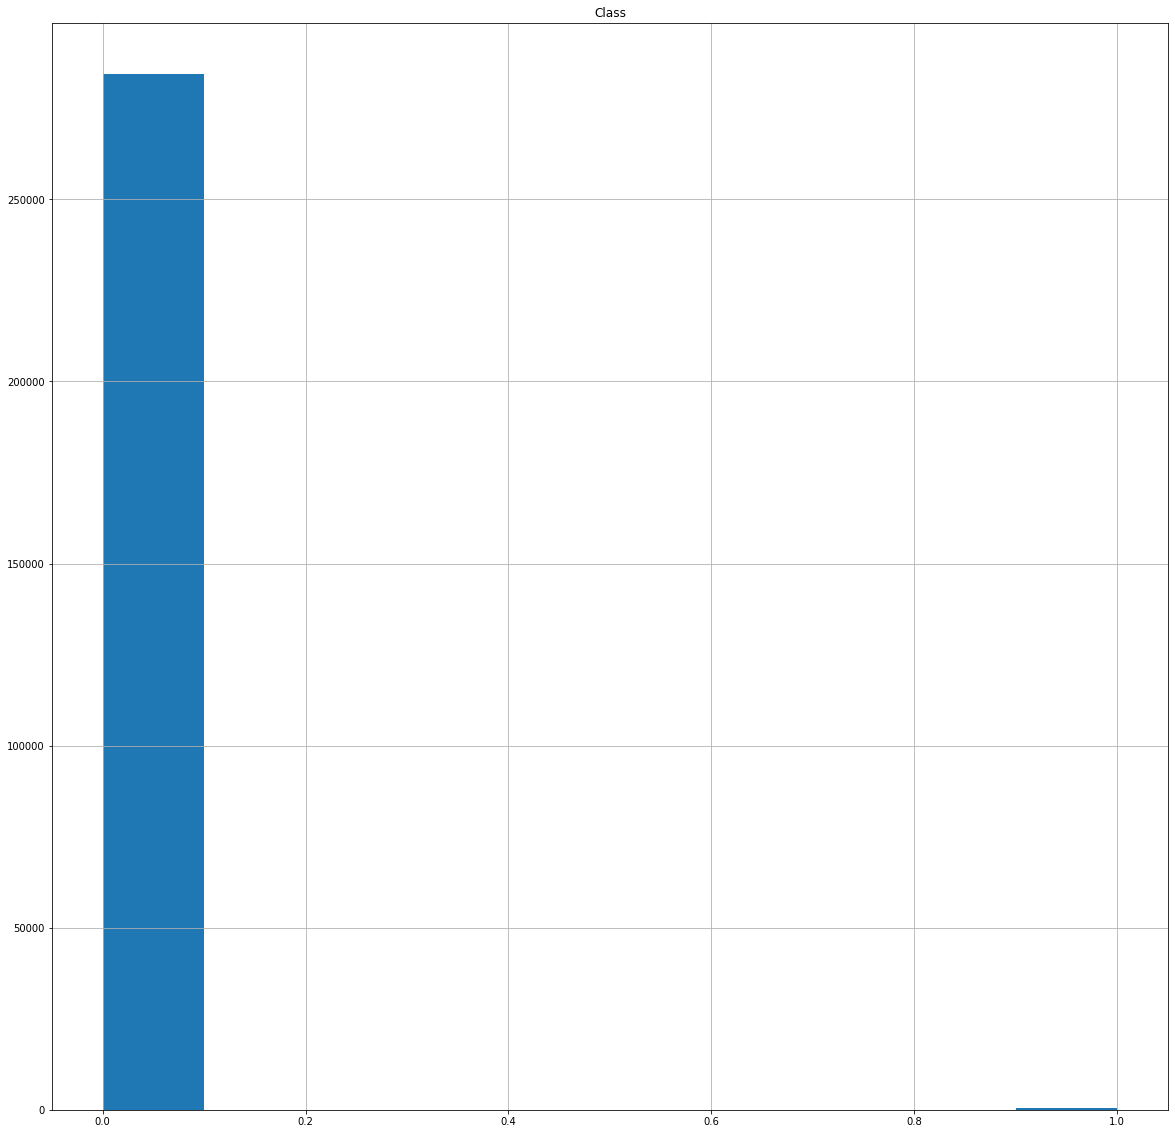

In [7]:
data.hist(column="Class",figsize=(20,20))
plt.show()

In [32]:
data_sample = data.sample(frac=0.1,random_state = 1)
print(data_sample.shape)
print(data_sample.describe)

(28481, 31)
<bound method NDFrame.describe of             Time        V1        V2        V3        V4        V5        V6  \
169876  119907.0 -0.611712 -0.769705 -0.149759 -0.224877  2.028577 -2.019887   
127467   78340.0 -0.814682  1.319219  1.329415  0.027273 -0.284871 -0.653985   
137900   82382.0 -0.318193  1.118618  0.969864 -0.127052  0.569563 -0.532484   
21513    31717.0 -1.328271  1.018378  1.775426 -1.574193 -0.117696 -0.457733   
134700   80923.0  1.276712  0.617120 -0.578014  0.879173  0.061706 -1.472002   
...          ...       ...       ...       ...       ...       ...       ...   
2032      1574.0 -0.615776  0.654356  2.618793  0.857434 -0.487340  0.593957   
240932  150813.0 -3.517229  3.326821 -3.590262  0.674769 -0.679266 -0.469516   
3701      3169.0 -0.315540  1.054303  1.484711  1.138262  0.394713 -0.168883   
153365   98752.0 -3.580417  4.100916 -2.577720 -1.476718 -0.006201 -2.008418   
97365    66187.0  1.213349  0.227172 -0.886860  1.345683  2.254592  3.7885

In [33]:
Fraud = data_sample[data_sample['Class'] == 1]
Valid = data_sample[data_sample['Class'] == 0]

In [10]:
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

0.0017234102419808666


In [34]:
print('Fraud Cases :{}'.format(len(data_sample[data_sample['Class'] == 1])))
print('Valid Trransactions:{}'.format(len(data_sample[data_sample['Class'] == 0])))

Fraud Cases :49
Valid Trransactions:28432


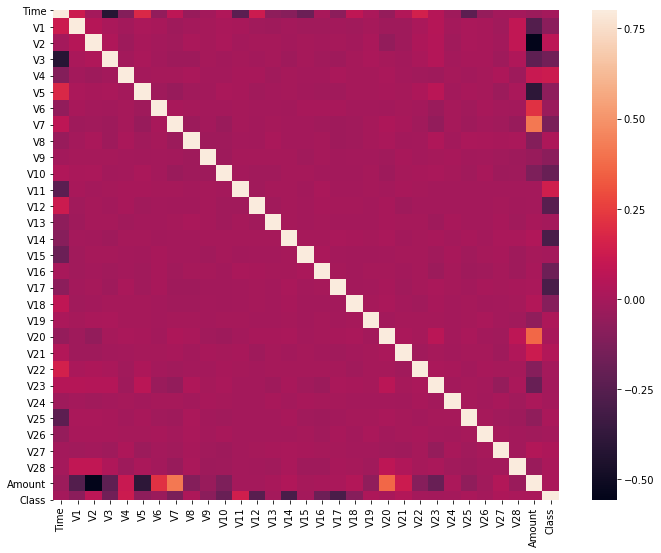

In [35]:
corrmat = data_sample.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax = .8,square = True)
plt.show()

In [36]:
columns = data_sample.columns.tolist()
print(columns)
columns = [c for c in columns if c not in ['Class']]
print(columns)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [37]:
target = "Class"
print(target)

Class


In [38]:
x = data_sample[columns]
y = data_sample[target]

print(x.shape)
print(y.shape)

(28481, 30)
(28481,)


In [66]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier

state = 1

classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(x),contamination=outlier_fraction,random_state=state),
    "RandomForestClassifier": RandomForestClassifier(random_state=0,n_estimators=100,criterion='entropy'),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction)
}

In [74]:

for i, (clf_name,clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(x)
        scores_pred = clf.negative_outlier_factor_
    elif clf_name == "RandomForestClassifier":
        clf.fit(x,y)
        y_pred = clf.predict(x)     
    else:
        clf.fit(x)
        scores_pred = clf.decision_function(x)
        y_pred = clf.predict(x)
        
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred !=y).sum()
    
    print('{}:{}'.format(clf_name,n_errors))
    print(accuracy_score(y,y_pred))
    print(classification_report(y,y_pred))

Isolation Forest:71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

RandomForestClassifier:49
0.9982795547909132
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.00      0.00      0.00        49

    accuracy                           1.00     28481
   macro avg       0.50      0.50      0.50     28481
weighted avg       1.00      1.00      1.00     28481



/home/naveen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Local Outlier Factor:97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



ARTIFICIAL NEURAL NETWORK

In [41]:
x_data = data.iloc[:,0:-1].values
x_data[0:2]

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02,
         2.53634674e+00,  1.37815522e+00, -3.38320770e-01,
         4.62387778e-01,  2.39598554e-01,  9.86979013e-02,
         3.63786970e-01,  9.07941720e-02, -5.51599533e-01,
        -6.17800856e-01, -9.91389847e-01, -3.11169354e-01,
         1.46817697e+00, -4.70400525e-01,  2.07971242e-01,
         2.57905802e-02,  4.03992960e-01,  2.51412098e-01,
        -1.83067779e-02,  2.77837576e-01, -1.10473910e-01,
         6.69280749e-02,  1.28539358e-01, -1.89114844e-01,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01,
         1.66480113e-01,  4.48154078e-01,  6.00176493e-02,
        -8.23608088e-02, -7.88029833e-02,  8.51016549e-02,
        -2.55425128e-01, -1.66974414e-01,  1.61272666e+00,
         1.06523531e+00,  4.89095016e-01, -1.43772296e-01,
         6.35558093e-01,  4.63917041e-01, -1.14804663e-01,
        -1.83361270e-01, -1.45783041e-01, -6.90831352e-

In [42]:
y_data = data.iloc[:,-1].values
y_data[0:5]

array([0, 0, 0, 0, 0])

In [45]:
unique,counts = np.unique(y_data,return_counts = True)
print(unique,counts)

[0 1] [284315    492]


In [46]:
from sklearn.preprocessing import StandardScaler
sclaer = StandardScaler()

In [47]:
x_data = sclaer.fit_transform(x_data)
x_data[0:2]

array([[-1.99658302, -0.69424232, -0.04407492,  1.6727735 ,  0.97336551,
        -0.24511658,  0.34706795,  0.19367894,  0.08263728,  0.33112778,
         0.08338555, -0.54040704, -0.61829572, -0.99609892, -0.32461019,
         1.60401384, -0.53683287,  0.24486345,  0.03076993,  0.49628203,
         0.32611802, -0.02492336,  0.38285444, -0.17691133,  0.11050692,
         0.24658544, -0.39217043,  0.33089162, -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592,  0.1097971 ,  0.31652293,
         0.04348335, -0.06181997, -0.06370021,  0.07125348, -0.23249419,
        -0.15334963,  1.58000285,  1.06608857,  0.4914182 , -0.14998248,
         0.69436042,  0.52943375, -0.13516997, -0.21876258, -0.17908605,
        -0.08961086, -0.3073768 , -0.88007675,  0.16220118, -0.56113055,
         0.3206939 ,  0.26106948, -0.02225568,  0.04460752, -0.34247454]])

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3)

In [49]:
from keras.models import Sequential
from keras.layers import Dense

In [52]:
classifier = Sequential()
classifier.add(Dense(40,input_dim = 30,activation = 'relu'))
classifier.add(Dense(30,input_dim = 40,activation = 'relu'))
classifier.add(Dense(20,input_dim = 30,activation = 'relu'))
classifier.add(Dense(10,input_dim = 20,activation = 'relu'))
classifier.add(Dense(6,input_dim = 10,activation = 'relu'))
classifier.add(Dense(4,input_dim = 6,activation = 'relu'))
classifier.add(Dense(1,input_dim = 4,activation = 'sigmoid'))

In [55]:
classifier.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [56]:
classifier.fit(x_train,y_train,epochs=200,batch_size=500)




Epoch 1/200





199364/199364 [==============================] - 9s 44us/step - loss: 0.6056 - acc: 0.9643
Epoch 2/200
199364/199364 [==============================] - 6s 29us/step - loss: 0.4554 - acc: 0.9993
Epoch 3/200
199364/199364 [==============================] - 4s 22us/step - loss: 0.3479 - acc: 0.9994
Epoch 4/200
199364/199364 [==============================] - 5s 23us/step - loss: 0.2694 - acc: 0.9994
Epoch 5/200
199364/199364 [==============================] - 5s 23us/step - loss: 0.2114 - acc: 0.9994
Epoch 6/200
199364/199364 [==============================] - 5s 23us/step - loss: 0.1681 - acc: 0.9994
Epoch 7/200
199364/199364 [==============================] - 5s 23us/step - loss: 0.1352 - acc: 0.9994
Epoch 8/200
199364/199364 [==============================] - 5s 23us/step - loss: 0.1097 - acc: 0.9995
Epoch 9/200
199364/199364 [==============================] - 4s 22us/step - loss: 0.0899 - acc: 0.9995
Epoch 10/200
199364/199364 [==============================] - 4s 

In [79]:
result=classifier.evaluate(x_test,y_test)
print(result)

85443/85443 [==============================] - 8s 96us/step
[0.004185387013474316, 0.9994265182636377]


the result of test score is 99.9% using Artificial Neural Network